In [30]:
from src.eda.eda import (
    print_basic_info, print_target_distribution_info, figure_missing_values,
    figure_target_distribution, figure_feature_distributions, figure_correlation_matrix,
    figure_pairplot, figure_tsne, feature_variance_explained, figure_msno_matrix
)
from src.data.dataset_interface import DataInterface
from src.data.data_loader import OpenMLDataLoader

In [31]:
dataset_name = 'arrhythmia'
data_loader = OpenMLDataLoader(dataset_name=dataset_name, version=1)
data_interface = DataInterface(data_loader=data_loader, dataset_name=dataset_name)
print_basic_info(data_interface.data)


Dataset shape:
(452, 279)

Dataset features count:
279

Dataset observation count:
452

Dataset overview:
   age sex  height  weight  QRSduration  PRinterval  Q-Tinterval  Tinterval  \
0   75   0     190      80           91         193          371        174   
1   56   1     165      64           81         174          401        149   
2   54   0     172      95          138         163          386        185   
3   55   0     175      94          100         202          380        179   
4   75   0     190      80           88         181          360        177   

   Pinterval  QRS  ...  chV6_JJwaveAmp  chV6_QwaveAmp  chV6_RwaveAmp  \
0        121  -16  ...            -0.3            0.0            9.0   
1         39   25  ...            -0.5            0.0            8.5   
2        102   96  ...             0.9            0.0            9.5   
3        143   28  ...             0.1            0.0           12.2   
4        103  -16  ...            -0.4            0.0     

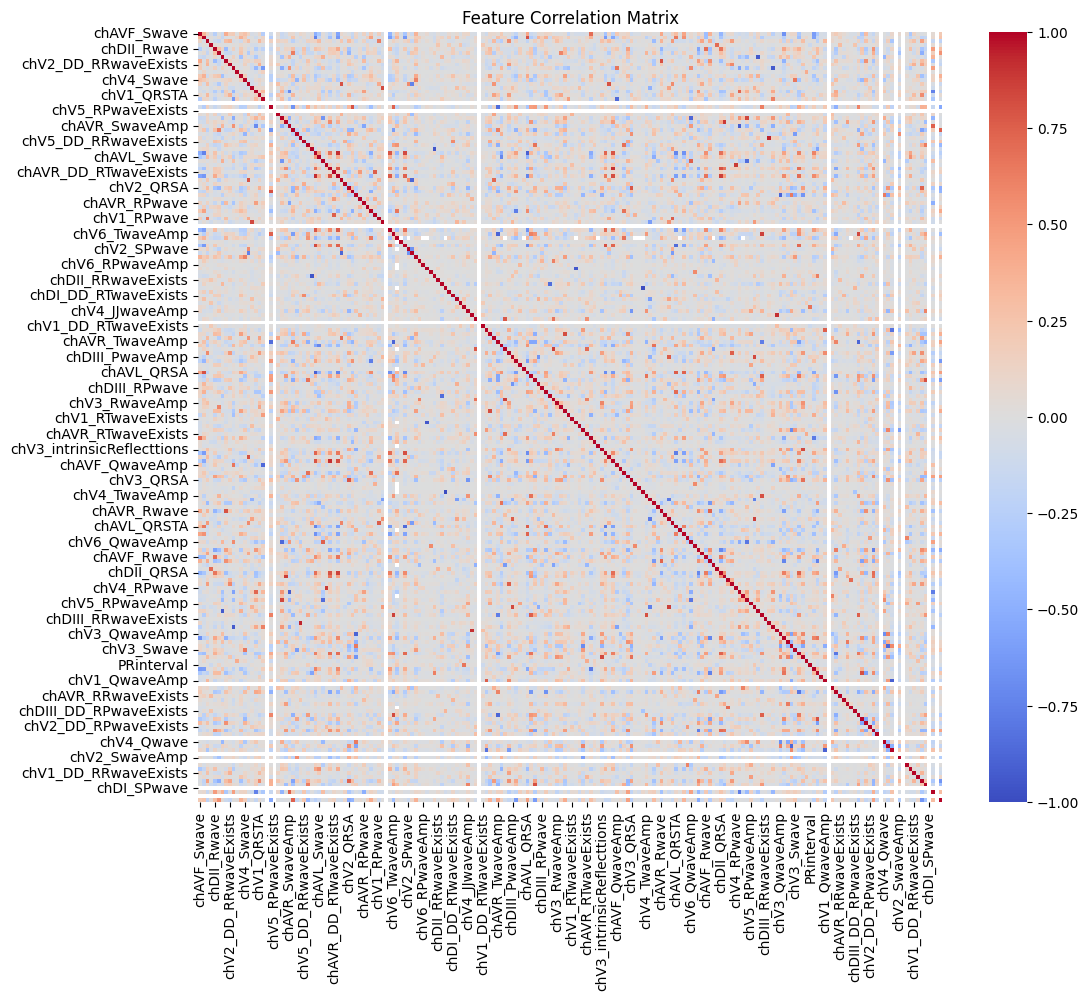

In [32]:
figure = figure_correlation_matrix(data_interface.data, 200)

In [33]:
data_interface.preprocess_data()

Removed 17 constant features.
Removed 7 correlated features.


In [34]:
print_basic_info(data_interface.data)


Dataset shape:
(452, 255)

Dataset features count:
255

Dataset observation count:
452

Dataset overview:
        age       sex    height    weight  QRSduration  PRinterval  \
0  1.734439 -1.107520  0.641327  0.713814     0.135505    0.844945   
1  0.579312  0.902918 -0.031998 -0.251644    -0.516072    0.420769   
2  0.457720 -1.107520  0.156533  1.618932     3.197915    0.175193   
3  0.518516 -1.107520  0.237332  1.558590     0.721924    1.045871   
4  1.734439 -1.107520  0.641327  0.713814    -0.059968    0.577044   

   Q-Tinterval  Tinterval  Pinterval       QRS  ...  chV5_QRSA  chV5_QRSTA  \
0     0.113709   0.113809   1.201469 -1.094661  ...   0.466295    1.230950   
1     1.013301  -0.588564  -1.977064 -0.191203  ...   0.228885    0.431593   
2     0.563505   0.422853   0.464980  1.373324  ...  -0.385946    0.628358   
3     0.383587   0.254284   2.054247 -0.125096  ...   1.154176    1.440012   
4    -0.216141   0.198094   0.503742 -1.094661  ...   0.234972    0.657052   

   

   Count  Percentage
1    245    54.20354
0    207    45.79646


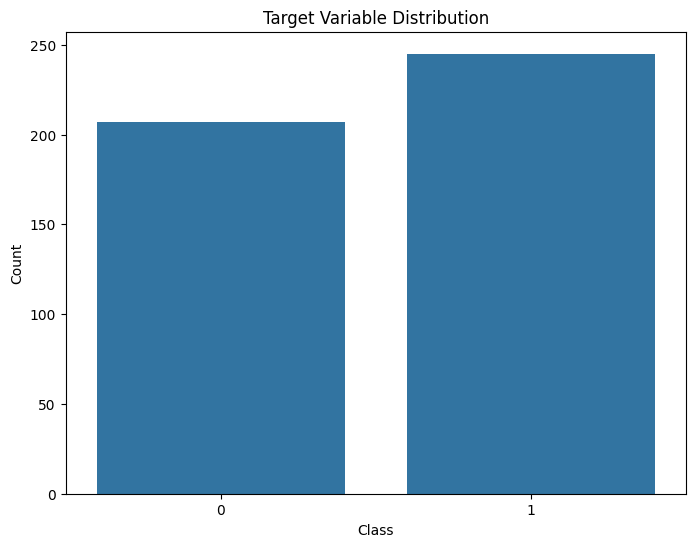

In [35]:
print_target_distribution_info(data_interface.data)
figure = figure_target_distribution(data_interface.data)

<Figure size 1500x1500 with 0 Axes>

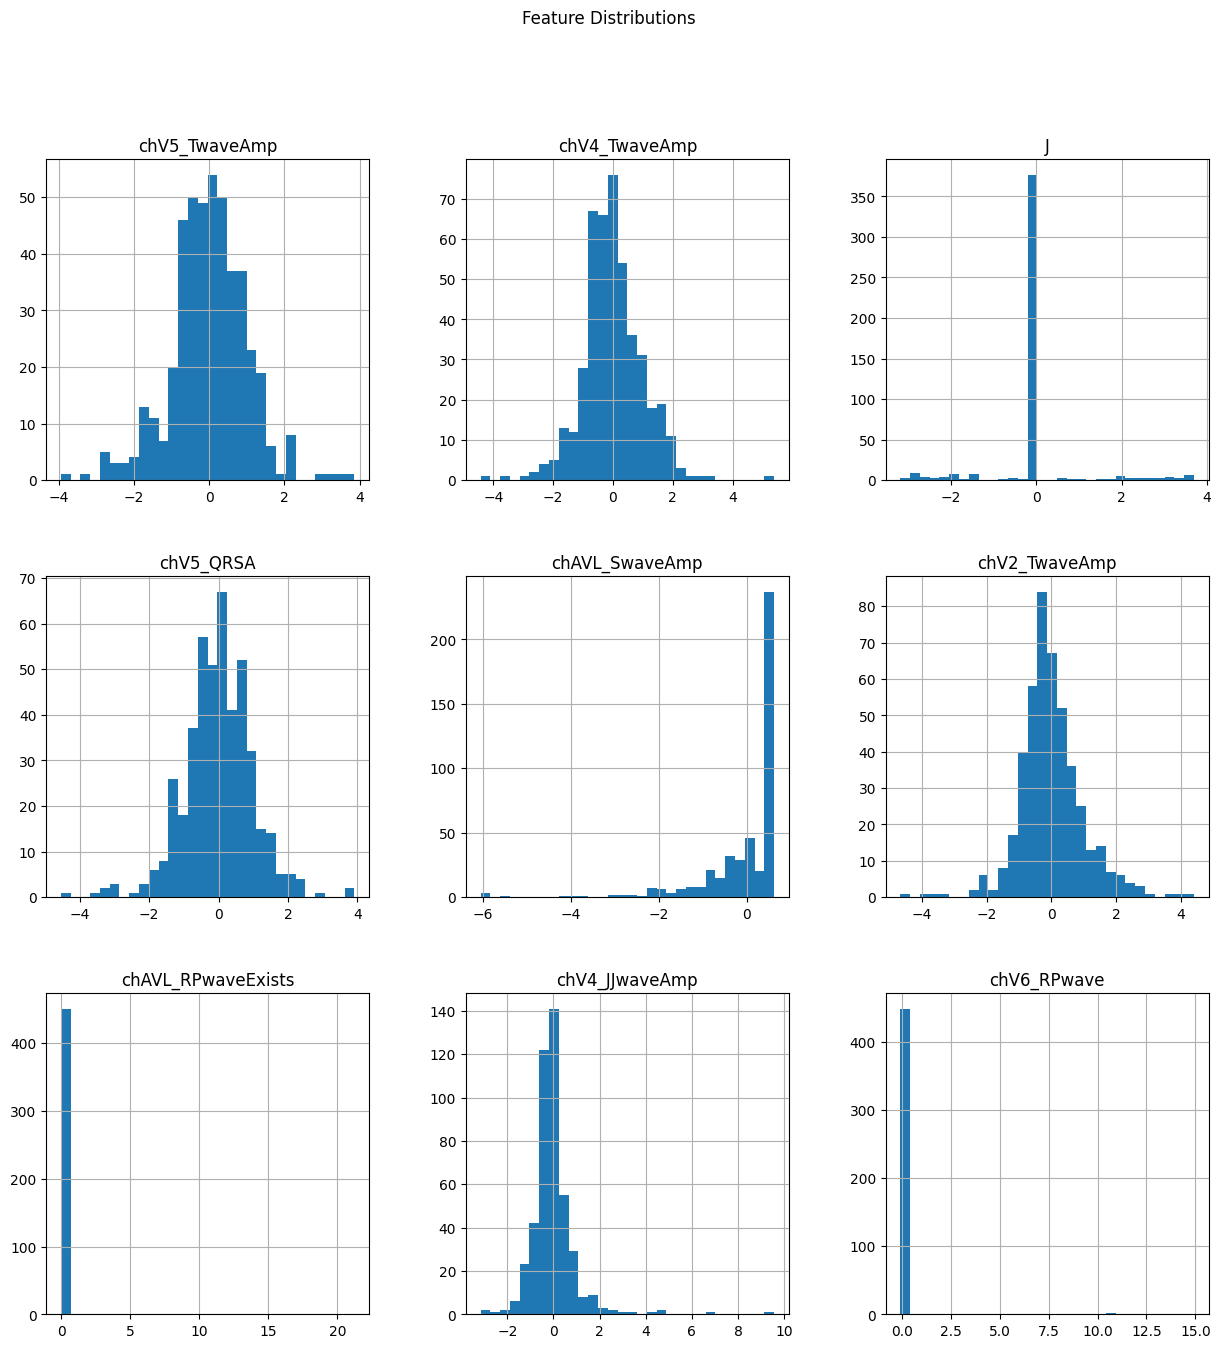

In [36]:
figure = figure_feature_distributions(data_interface.data, 9)

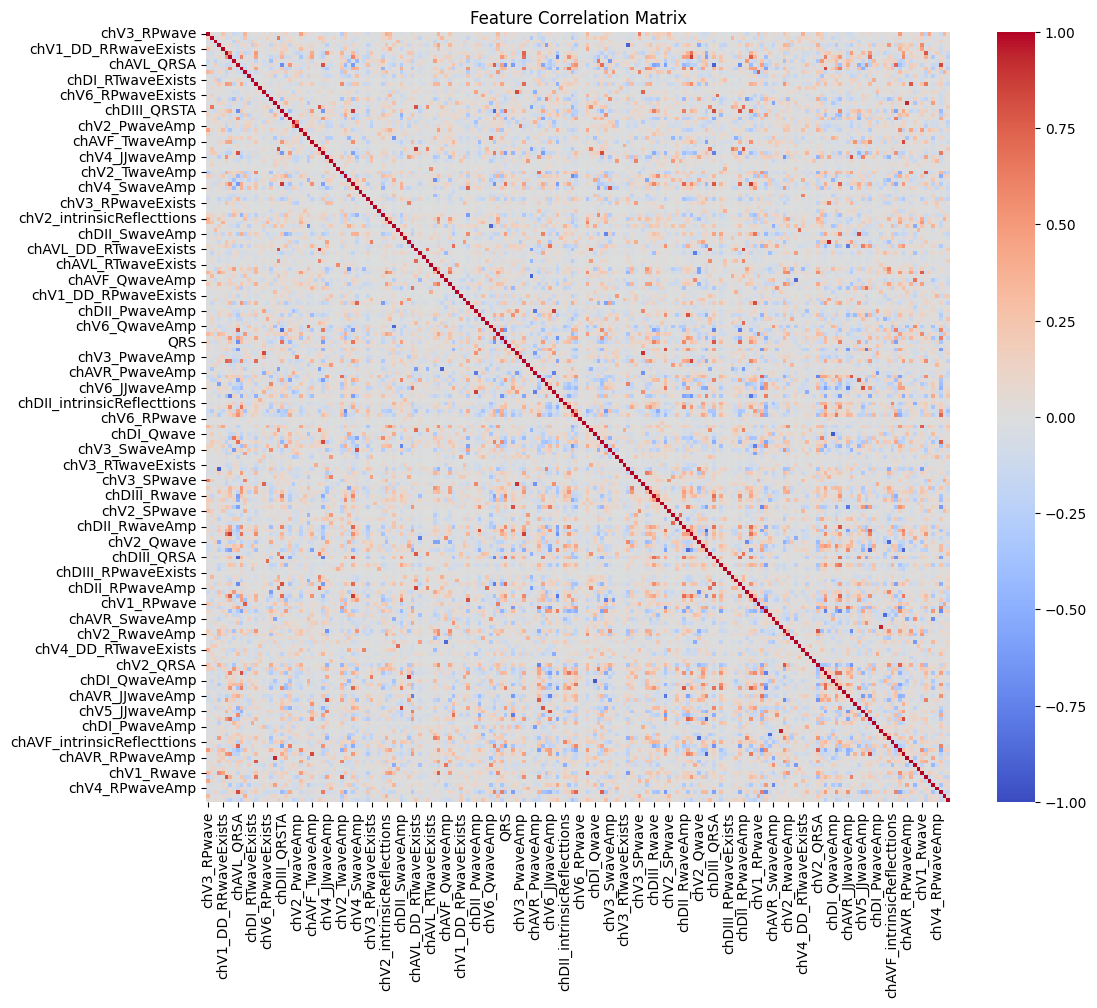

In [37]:
figure = figure_correlation_matrix(data_interface.data, 200)

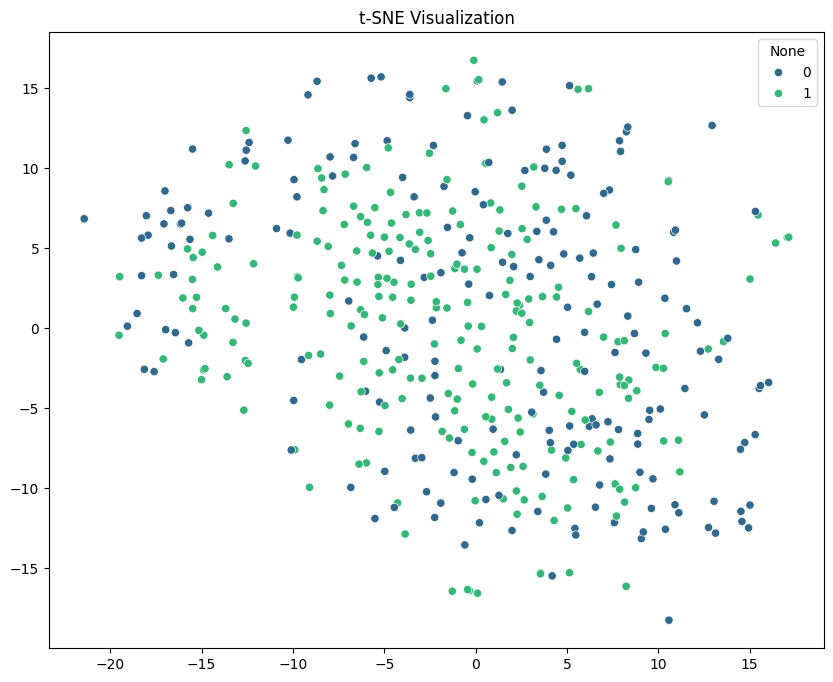

In [38]:
figure = figure_tsne(data_interface.data)

In [39]:
feature_importance = feature_variance_explained(data_interface.data)
print(feature_importance)

                      Variance Explained
chAVF_JJwaveAmp                 0.052933
chV1_SwaveAmp                   0.052679
chAVF_Rwave                     0.052650
chV2_SwaveAmp                   0.052527
chV5_SwaveAmp                   0.052458
...                                  ...
chDI_DD_RPwaveExists            0.034321
chDIII_QRSA                     0.034275
chAVF_RTwaveExists              0.031889
chDIII_RRwaveExists             0.028997
chDIII_RPwaveExists             0.027843

[255 rows x 1 columns]


Feature ranking:
1. Feature heartrate (0.0389968782917569)
2. Feature QRSduration (0.025905733277350584)
3. Feature chV3_QRSTA (0.02392819268011133)
4. Feature chAVR_TwaveAmp (0.019451639960333573)
5. Feature chV1_RPwaveAmp (0.01895179144512297)
6. Feature chDII_TwaveAmp (0.01809175340824019)
7. Feature chAVR_QRSTA (0.017424917299006283)
8. Feature chV6_QRSTA (0.0167907891741552)
9. Feature chAVL_TwaveAmp (0.01593728813109985)
10. Feature chDI_TwaveAmp (0.01582160185192396)
11. Feature chV6_TwaveAmp (0.015288387019473071)
12. Feature chV1_RPwave (0.014912277381860115)
13. Feature chDII_QRSTA (0.014494755800118888)
14. Feature chDI_QRSTA (0.014077223493673699)
15. Feature T (0.011992751928768742)
16. Feature chV1_QRSA (0.01184103936986412)
17. Feature chV4_QRSTA (0.011213405405179906)
18. Feature chV1_intrinsicReflecttions (0.01097962177088884)
19. Feature chV3_Swave (0.010735347786082747)
20. Feature Pinterval (0.010599526759526629)
21. Feature chDI_SwaveAmp (0.010333929388145351)
22. 

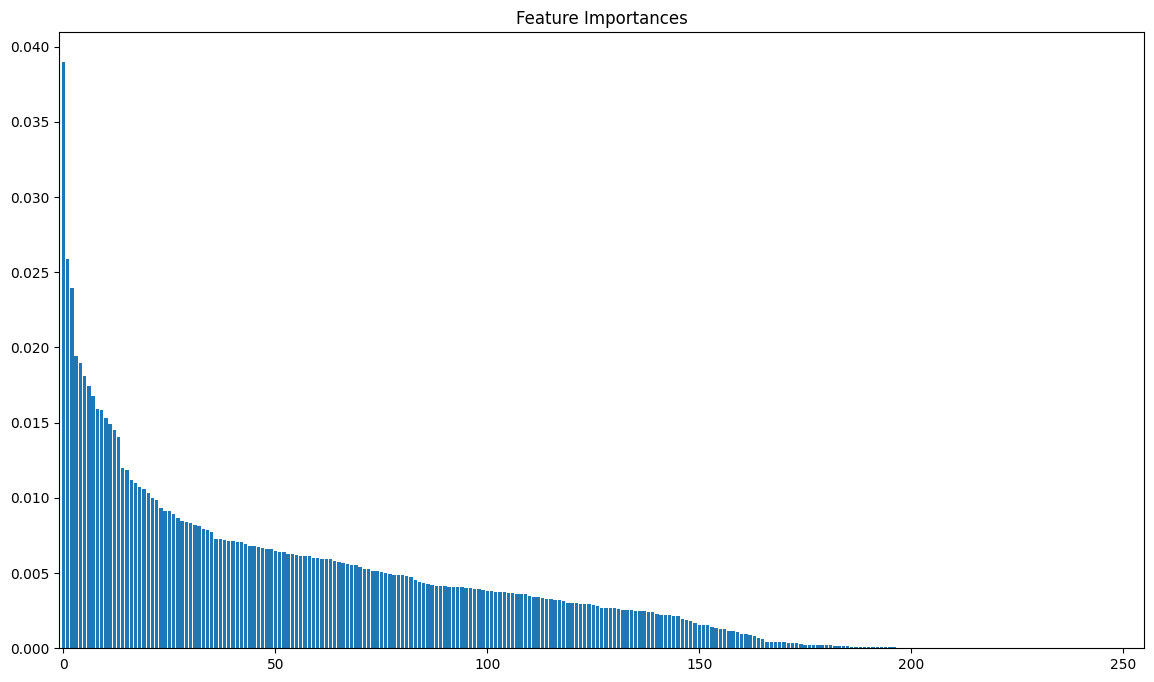

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

data_interface.split_data()
data = data_interface.get_data()
X_train, y_train = data['train_data'].values, data['train_labels'].values
X_test, y_test = data['test_data'].values, data['test_labels'].values
X_valid, y_valid = data['val_data'].values, data['val_labels'].values

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
feature_names = data_interface.data.data.columns.tolist()

for f in range(X_train.shape[1]):
    print(f"{f + 1}. Feature {feature_names[indices[f]]} ({importances[indices[f]]})")
plt.figure(figsize=(14, 8))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xlim([-1, X_train.shape[1]])
plt.show()